## 1. DATA PREPROCESSING

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

2024-05-01 20:34:53.672719: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-01 20:34:53.672981: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 20:34:53.675205: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 20:34:53.696158: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 20:34:54.116644: W tensorflow/compiler/tf2tensorrt/utils/py_uti

In [2]:
dataset = pd.read_csv("features_3_sec.csv")
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
#Checking for null values
dataset = pd.read_csv("features_3_sec.csv")
null_values = dataset.isnull().sum()

print("Null values in each column:")
print(null_values)


Null values in each column:
filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean     

Class distribution:
label
blues        1000
jazz         1000
pop          1000
reggae       1000
metal        1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64

Class proportions:
label
blues        0.1001
jazz         0.1001
pop          0.1001
reggae       0.1001
metal        0.1001
disco        0.1000
classical    0.0999
hiphop       0.0999
rock         0.0999
country      0.0998
Name: proportion, dtype: float64


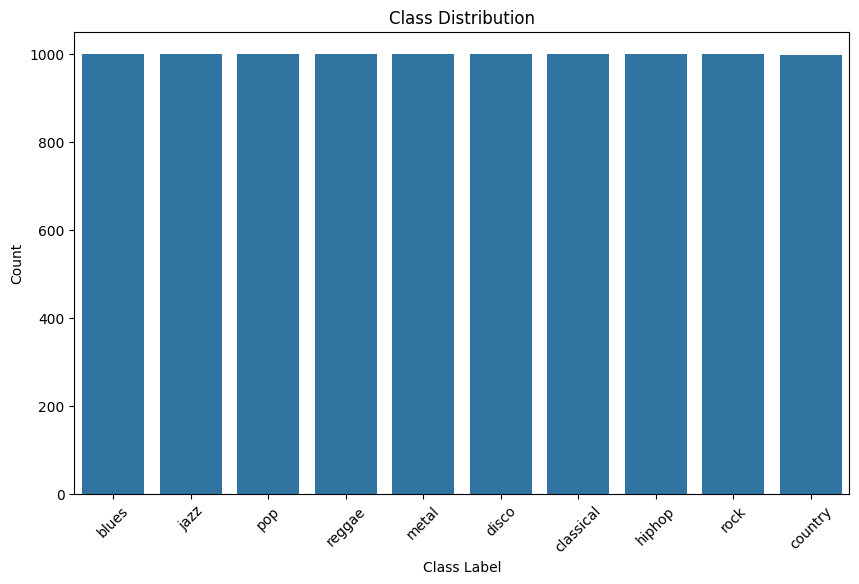

In [4]:
## Checking for Class Imbalance

import pandas as pd

dataset = pd.read_csv("features_3_sec.csv")
class_counts = dataset['label'].value_counts()
print("Class distribution:")
print(class_counts)
class_proportions = dataset['label'].value_counts(normalize=True)
print("\nClass proportions:")
print(class_proportions)

plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='label', order=class_counts.index)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


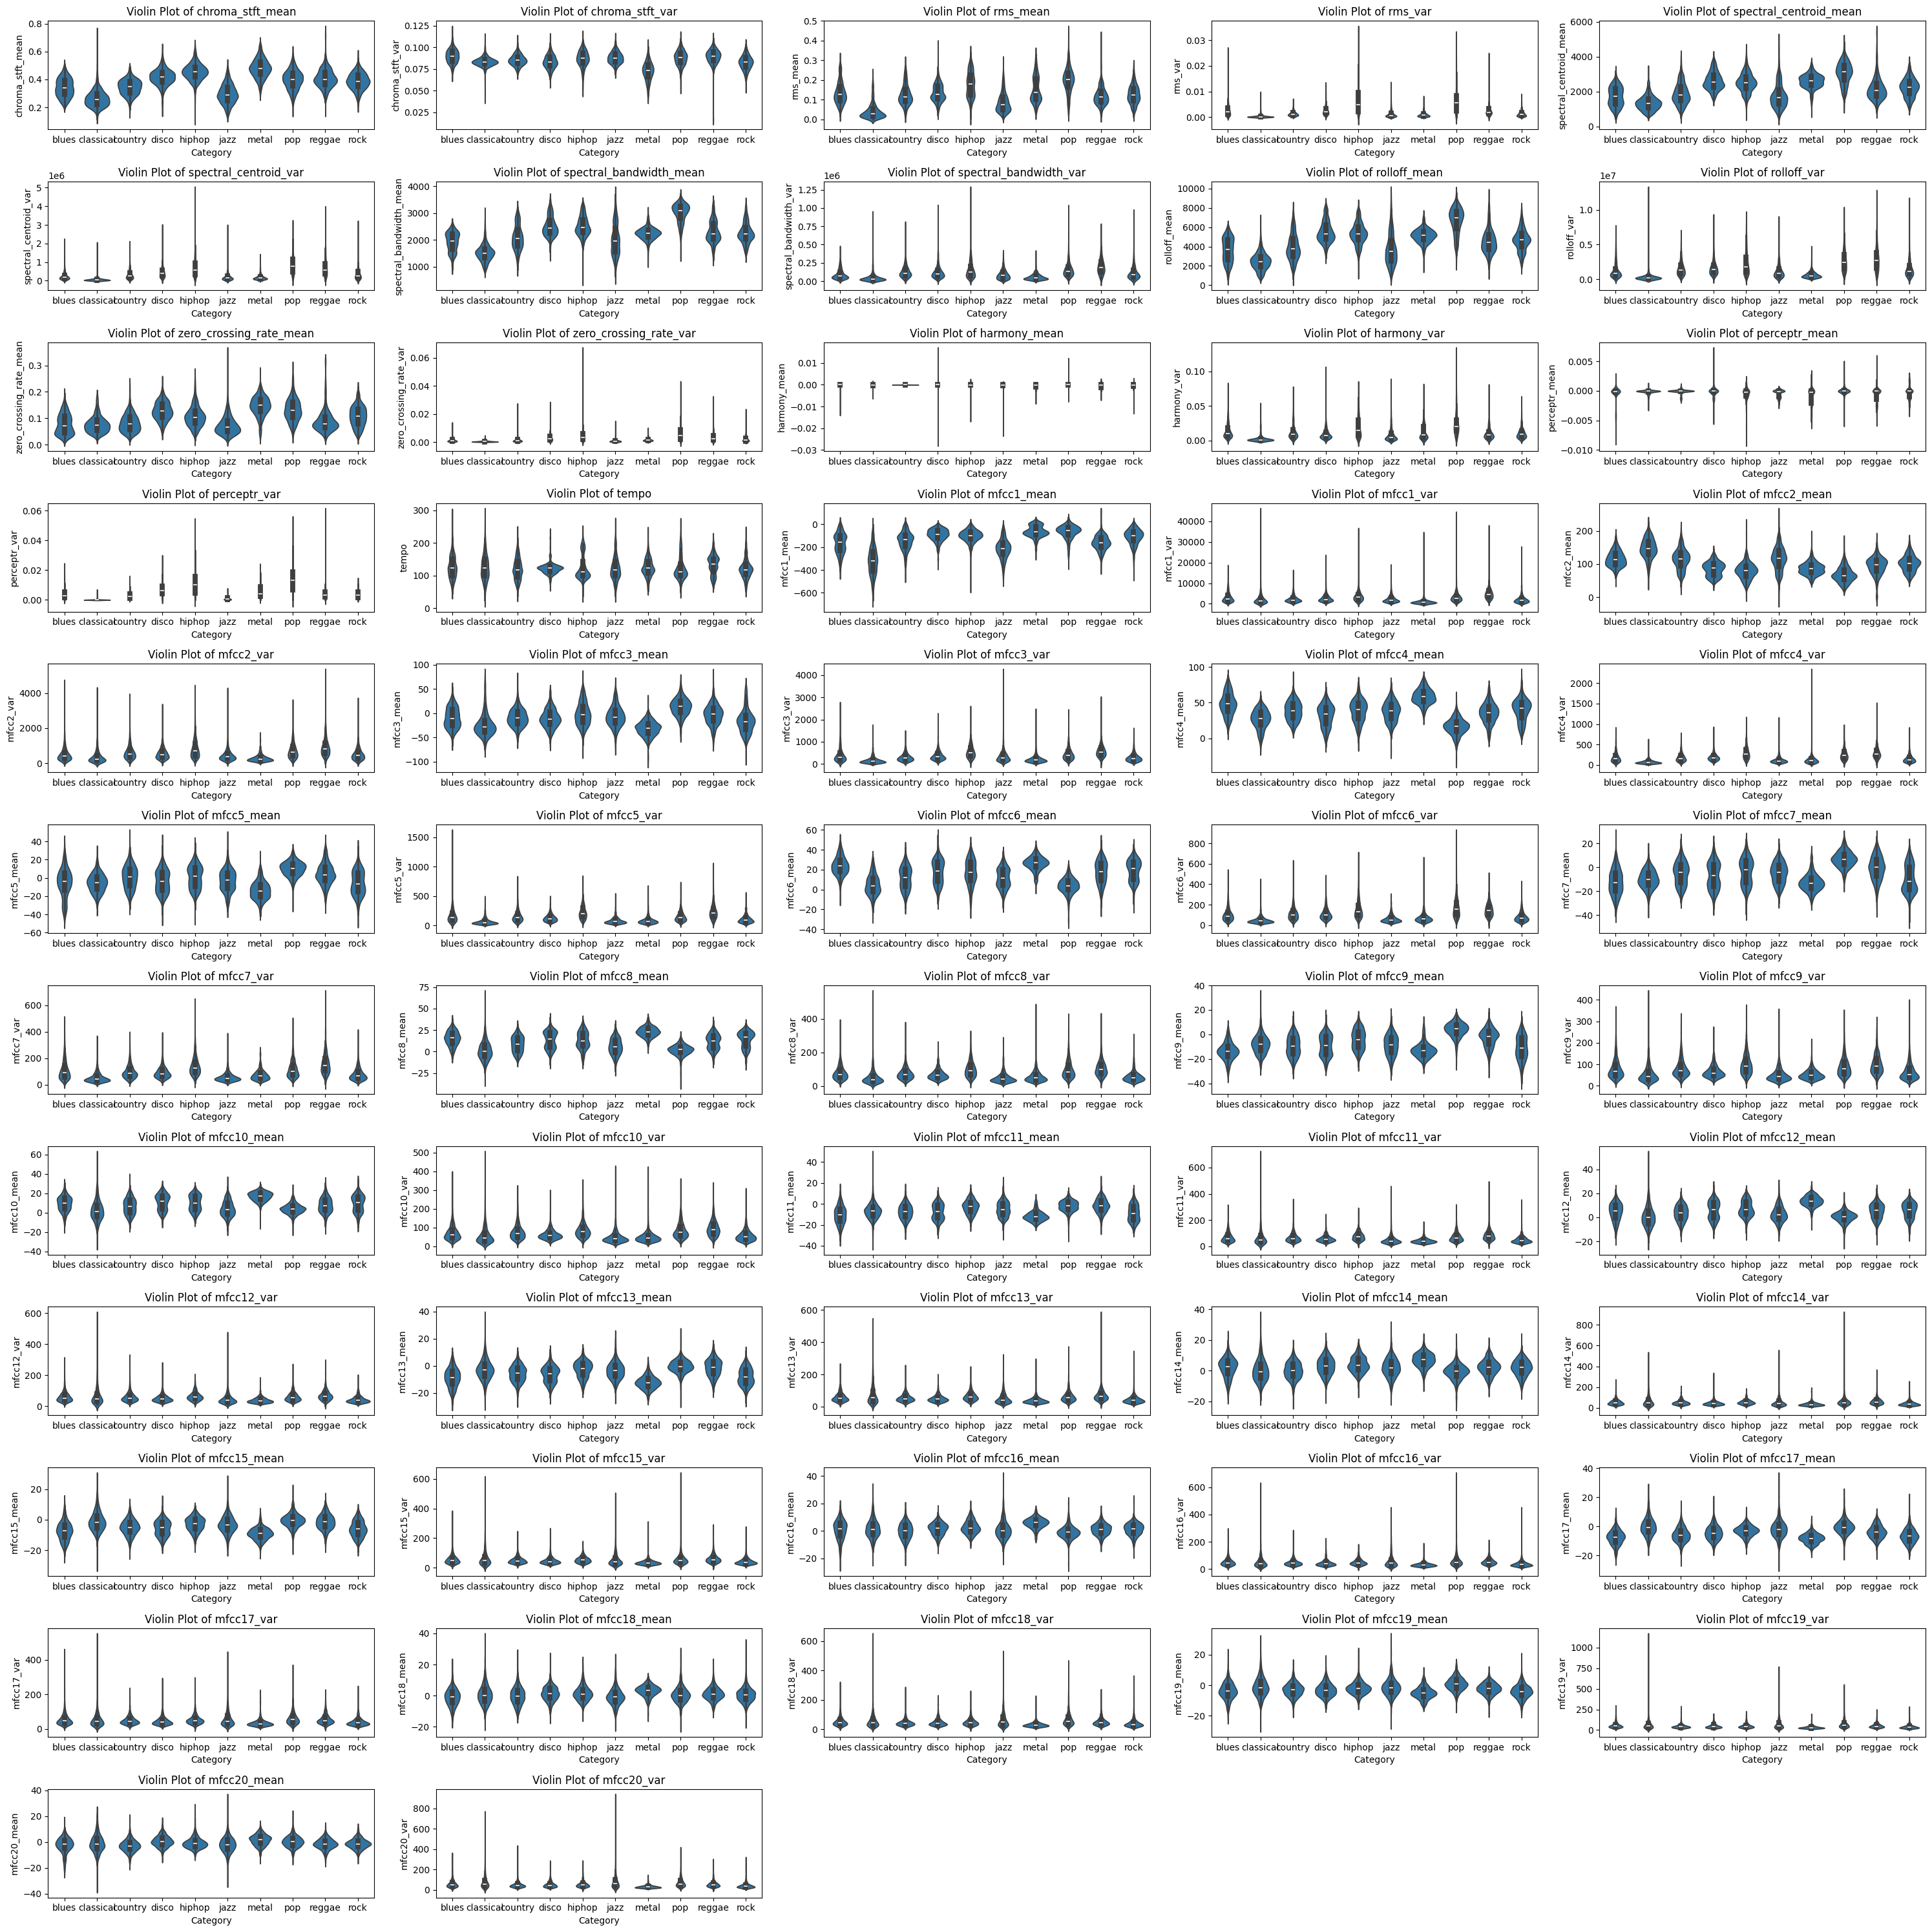

In [5]:
## Violin Plot for all the variables

audio_features = [
    'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
    'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var',
    'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
    'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var',
    'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var',
    'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var',
    'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var',
    'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
    'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
    'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var',
    'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
    'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var',
    'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var',
    'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'
]

plt.figure(figsize=(30, 30))
for i, feature in enumerate(audio_features):
    plt.subplot(12, 5, i+1)
    sns.violinplot(y=dataset[feature], x=dataset['label'])
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel('Category')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


## 2.FEAUTRE SELECTION

In [6]:
## Variable Inflation factor

audio_features = [
    'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
    'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var',
    'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
    'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var',
    'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var',
    'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var',
    'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var',
    'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
    'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
    'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var',
    'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
    'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var',
    'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var',
    'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'
]

dataset = dataset.dropna()

if 'label' in dataset.columns:
    dataset = dataset.drop(['label'], axis=1)

X = sm.add_constant(dataset[audio_features])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

print(vif_data)


                    Feature          VIF
0                     const  2703.515224
1    spectral_centroid_mean   185.494010
2              rolloff_mean   118.856952
3   spectral_bandwidth_mean    77.964079
4                  rms_mean    51.227912
5   zero_crossing_rate_mean    26.767622
6     spectral_centroid_var    20.730610
7                mfcc2_mean    20.273645
8                mfcc1_mean    19.701721
9               harmony_var    15.550854
10              rolloff_var    15.139926
11             perceptr_var     9.233448
12   zero_crossing_rate_var     8.054137
13   spectral_bandwidth_var     6.843537
14               mfcc3_mean     5.610340
15         chroma_stft_mean     4.118726
16               mfcc8_mean     4.116641
17                mfcc2_var     4.009512
18                  rms_var     3.840067
19               mfcc6_mean     3.832028
20               mfcc7_mean     3.334704
21              mfcc10_mean     3.139112
22               mfcc4_mean     3.131581
23              

/tmp/ipykernel_55648/1004132785.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, len(explained_variance_ratio) + 1), y=explained_variance_ratio, palette="viridis")


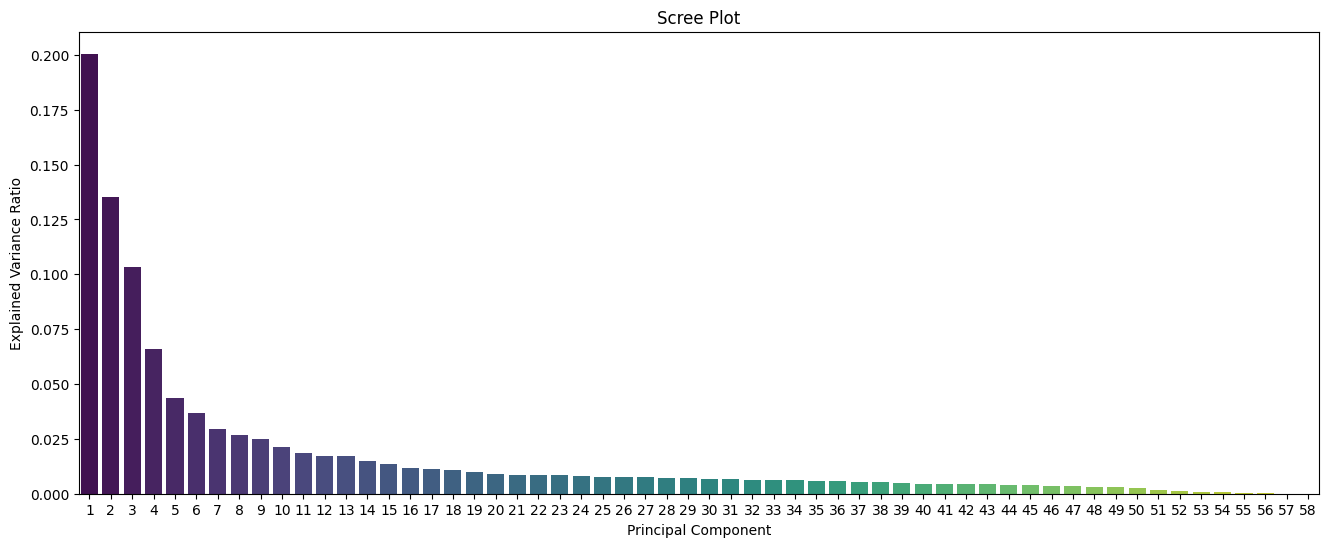

In [7]:
## Principle Component Analysis

dataset = pd.read_csv("features_3_sec.csv")
dataset = dataset.dropna()

X = dataset.drop(['filename', 'label'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
principal_components = pca.fit_transform(X_scaled)

principal_df = pd.DataFrame(data=principal_components, 
                            columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(16, 6))
sns.barplot(x=np.arange(1, len(explained_variance_ratio) + 1), y=explained_variance_ratio, palette="viridis")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [8]:
# Components that explain 95% of variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

[0.20054986 0.33597697 0.43943017 0.50537365 0.54893482 0.58570649
 0.61524415 0.64178214 0.6666691  0.68809079 0.70667391 0.7240725
 0.74116565 0.75603422 0.76972878 0.78146718 0.79260394 0.80336279
 0.81309032 0.8222254  0.83089046 0.83937994 0.84780919 0.85587173
 0.86369764 0.87129    0.87879844 0.88612124 0.89311331 0.89992059
 0.90666592 0.91313475 0.91943805 0.92558901 0.93160614 0.93739532
 0.94284579 0.94809187 0.9531278  0.95773268 0.96225323 0.96673743
 0.9710029  0.97511868 0.97913381 0.98283949 0.98634114 0.98952193
 0.99247466 0.99496431 0.99675402 0.99803379 0.99897739 0.99959097
 0.99980178 0.999939   1.         1.        ]
Number of components explaining 95% variance: 39


## 3. MACHINE LEARNING MODELS

# RANDOM FOREST

In [9]:
dataset = pd.read_csv("features_3_sec.csv")

all_features = dataset.columns[1:-1]  

dataset = dataset.dropna()

X = dataset[all_features]
y = dataset['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("RF score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

RF score: 0.8828828828828829

Classification Report:
               precision    recall  f1-score   support

       blues       0.87      0.87      0.87       208
   classical       0.94      0.98      0.96       203
     country       0.80      0.84      0.82       186
       disco       0.85      0.83      0.84       199
      hiphop       0.92      0.89      0.90       218
        jazz       0.86      0.93      0.89       192
       metal       0.87      0.95      0.91       204
         pop       0.92      0.95      0.93       180
      reggae       0.92      0.88      0.90       211
        rock       0.89      0.72      0.79       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



## CNN

In [11]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))
y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded, num_classes)
y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded, num_classes)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_cnn, y_train_categorical, epochs=200, batch_size=32, validation_split=0.1, verbose=0)

y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_classes))



/home/psy-ubuntu/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-01 20:35:06.270766: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:35:06.270921: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Test Accuracy: 0.9009009009009009

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       208
           1       0.90      0.97      0.93       203
           2       0.82      0.91      0.86       186
           3       0.92      0.83      0.87       199
           4       0.96      0.90      0.93       218
           5       0.89      0.89      0.89       192
           6       0.95      0.96      0.96       204
           7       0.86      0.96      0.91       180
           8       0.93      0.88      0.91       211
           9       0.89      0.81      0.85       197

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998



## K - Nearest Neighbour

In [12]:
knn_classifier = KNeighborsClassifier(n_neighbors=27, p=2, metric='euclidean')
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

knn_score = accuracy_score(y_test, y_pred)
print('Accuracy:', knn_score)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7952952952952953

Classification Report:
               precision    recall  f1-score   support

       blues       0.88      0.77      0.82       208
   classical       0.85      0.97      0.90       203
     country       0.68      0.77      0.72       186
       disco       0.63      0.81      0.71       199
      hiphop       0.92      0.70      0.79       218
        jazz       0.82      0.77      0.79       192
       metal       0.87      0.89      0.88       204
         pop       0.83      0.88      0.86       180
      reggae       0.77      0.77      0.77       211
        rock       0.78      0.64      0.70       197

    accuracy                           0.80      1998
   macro avg       0.80      0.80      0.79      1998
weighted avg       0.80      0.80      0.80      1998



## Support Vector Machine

In [13]:
clf = SVC(kernel='rbf', C=3.0, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

score = clf.score(X_test, y_test)
print("Accuracy:", score)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9109109109109109

Classification Report:
               precision    recall  f1-score   support

       blues       0.90      0.93      0.91       208
   classical       0.91      0.98      0.95       203
     country       0.85      0.88      0.86       186
       disco       0.87      0.86      0.87       199
      hiphop       0.95      0.92      0.93       218
        jazz       0.94      0.90      0.92       192
       metal       0.95      0.96      0.95       204
         pop       0.94      0.94      0.94       180
      reggae       0.91      0.93      0.92       211
        rock       0.89      0.80      0.84       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



## XG Boost

In [14]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_encoded)))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9109109109109109

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       208
           1       0.93      0.97      0.95       203
           2       0.81      0.87      0.84       186
           3       0.89      0.90      0.90       199
           4       0.96      0.90      0.93       218
           5       0.88      0.92      0.90       192
           6       0.94      0.96      0.95       204
           7       0.95      0.96      0.96       180
           8       0.93      0.91      0.92       211
           9       0.91      0.84      0.87       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



## Results and Interpretation

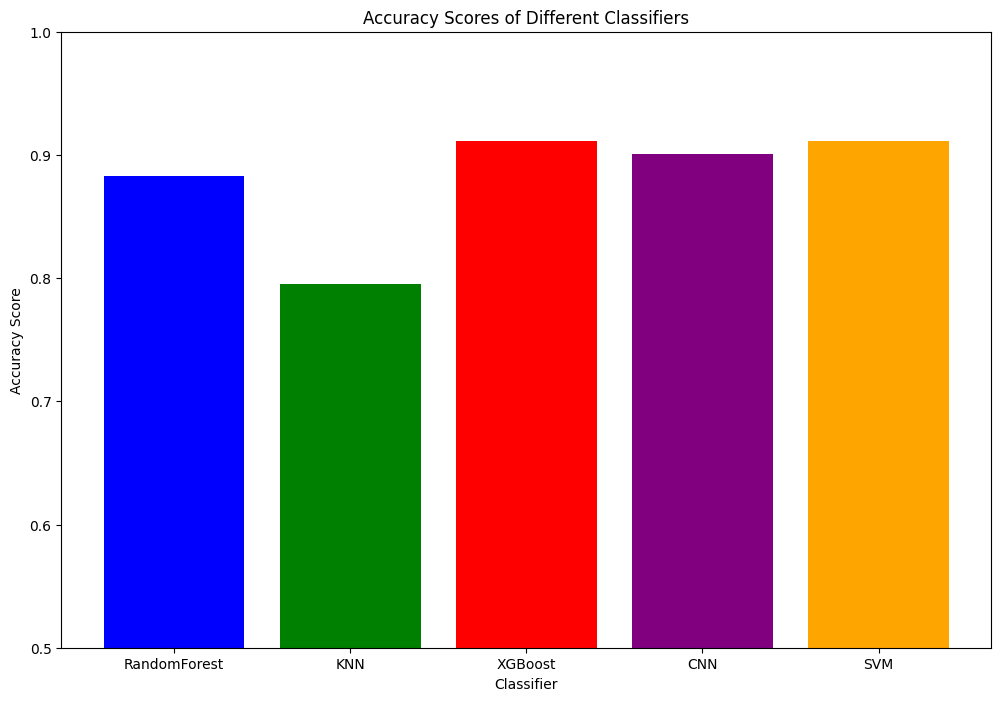

In [15]:
import matplotlib.pyplot as plt

accuracies = {
    'RandomForest': 0.8828828828828829,
    'KNN': 0.7952952952952953,
    'XGBoost': 0.9109109109109109,
    'CNN': 0.9004004004004004,
    'SVM': 0.9109109109109109
}

plt.figure(figsize=(12, 8))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers')
plt.ylim(0.5, 1)  
plt.show()


## 4. Model Improvement - Hyperparameter Tuning 

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV

dataset = pd.read_csv('features_3_sec.csv')
X = dataset.iloc[:, 2:59]
Y = dataset.iloc[:, 59]

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

sc_X = StandardScaler()
x_train_scaled = sc_X.fit_transform(x_train)
x_test_scaled = sc_X.transform(x_test)

clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train_encoded)))

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=12)

grid_search.fit(x_train_scaled, y_train_encoded)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

score = accuracy_score(y_test_encoded, y_pred)
print("\nClassifier Score:", score)

print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

results = pd.DataFrame(grid_search.cv_results_)
print("\nResults of all iterations:\n", results)


In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

sc_X = StandardScaler()
x_train_scaled = sc_X.fit_transform(x_train)
x_test_scaled = sc_X.transform(x_test)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=12)

grid_search.fit(x_train_scaled, y_train_encoded)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

score = accuracy_score(y_test_encoded, y_pred)
print("\nClassifier Score:", score)

print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

results = pd.DataFrame(grid_search.cv_results_)
print("\nResults of all iterations:\n", results)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Classifier Score: 0.9314314314314315

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       208
           1       0.90      0.99      0.94       203
           2       0.89      0.90      0.90       186
           3       0.92      0.91      0.92       199
           4       0.94      0.94      0.94       218
           5       0.94      0.92      0.93       192
           6       0.97      0.99      0.98       204
           7       0.93      0.95      0.94       180
           8       0.95      0.93      0.94       211
           9       0.93      0.82      0.87       197

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998


Results of all iterations:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0     

## 5.SHAP VALUES

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

dataset = pd.read_csv('features_3_sec.csv')
X = dataset.iloc[:, 2:59]
Y = dataset.iloc[:, 59]

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

param_grid = {
    'n_estimators': [150],
    'max_depth': [7],
    'learning_rate': [0.1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
}

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

sc_X = StandardScaler()
x_train_scaled = sc_X.fit_transform(x_train)
x_test_scaled = sc_X.transform(x_test)

clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train_encoded)))

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=12)

grid_search.fit(x_train_scaled, y_train_encoded)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

score = accuracy_score(y_test_encoded, y_pred)
print("\nClassifier Score:", score)

print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

results = pd.DataFrame(grid_search.cv_results_)
print("\nResults of all iterations:\n", results)

Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.7}

Classifier Score: 0.9064064064064065

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       208
           1       0.95      0.99      0.97       203
           2       0.80      0.90      0.85       186
           3       0.89      0.90      0.89       199
           4       0.96      0.89      0.92       218
           5       0.90      0.92      0.91       192
           6       0.95      0.96      0.95       204
           7       0.95      0.96      0.95       180
           8       0.90      0.88      0.89       211
           9       0.87      0.82      0.85       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998


Results of all iterations:
    mean_fit_time  std_fi

Shape of shap_values: (1998, 57, 10)
Shape of x_test_scaled: (1998, 57)


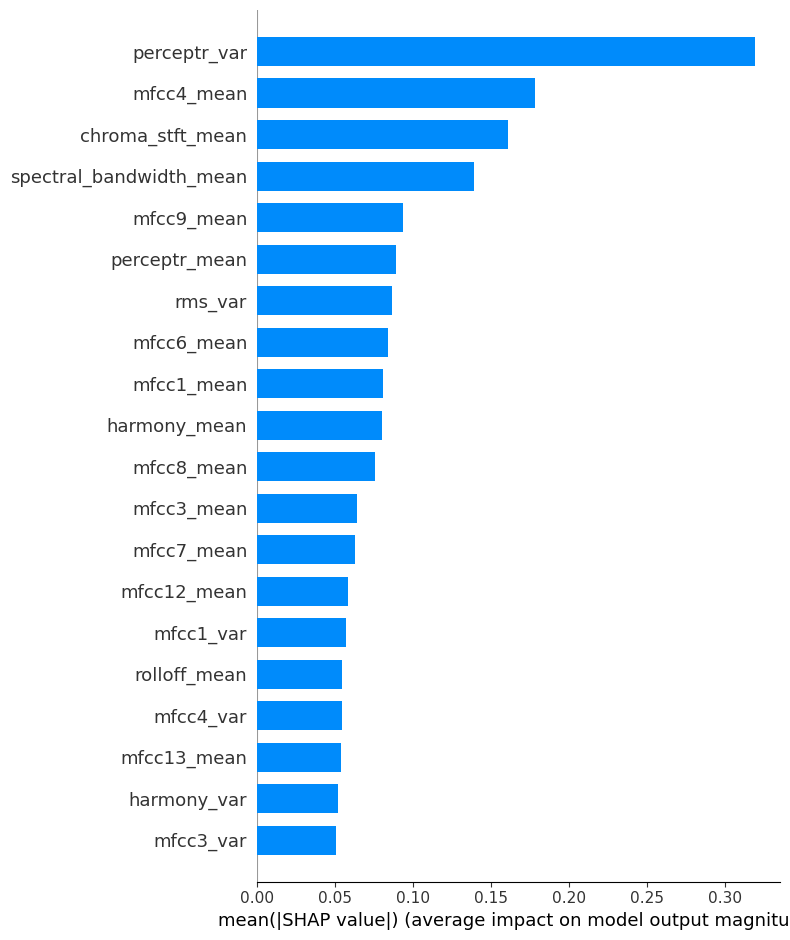

In [ ]:
import shap
import matplotlib.pyplot as plt

shap_values = explainer.shap_values(x_test_scaled)

print("Shape of shap_values:", shap_values.shape)
print("Shape of x_test_scaled:", x_test_scaled.shape)

if len(shap_values.shape) == 3:
    # For multi-class, average SHAP values across classes
    shap_values = np.mean(shap_values, axis=2)

shap.summary_plot(shap_values, x_test_scaled, feature_names=list(audio_features), plot_type='bar')
plt.show()